In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df=pd.read_csv("car_price_dataset_900.csv")
df

,brand,year,mileage_kmpl,engine_cc,horsepower,transmission,fuel_type,owner_type,price
0,Mercedes,2023,20.92,3078,107,automatic,electric,second,813805.13
1,Mercedes,2017,20.65,2844,339,manual,petrol,second,501144.16
2,BMW,2007,10.19,964,398,automatic,diesel,first,465527.87
3,Hyundai,2022,17.27,1577,361,automatic,hybrid,first,635489.75
4,Toyota,2018,21.53,2386,135,manual,petrol,first,281206.83
...,...,...,...,...,...,...,...,...,...
895,Mercedes,2018,21.48,1949,301,manual,electric,second,757209.24
896,BMW,2018,16.11,3313,195,manual,diesel,first,500238.96
897,Mercedes,2021,23.21,976,101,manual,diesel,first,587924.94
898,Mercedes,2019,12.66,2521,314,automatic,petrol,second,579831.93


In [15]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,brand,year,mileage_kmpl,engine_cc,horsepower,transmission,fuel_type,owner_type,price
0,4,2023,20.92,3078,107,0,1,1,813805.13
1,4,2017,20.65,2844,339,1,3,1,501144.16
2,0,2007,10.19,964,398,0,0,0,465527.87
3,3,2022,17.27,1577,361,0,2,0,635489.75
4,5,2018,21.53,2386,135,1,3,0,281206.83
...,...,...,...,...,...,...,...,...,...
895,4,2018,21.48,1949,301,1,1,1,757209.24
896,0,2018,16.11,3313,195,1,0,0,500238.96
897,4,2021,23.21,976,101,1,0,0,587924.94
898,4,2019,12.66,2521,314,0,3,1,579831.93


In [16]:
x=df.drop("price",axis=1) #features
y=df["price"] # target


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [19]:
y_pred=model.predict(x_test)
y_pred

array([309894.15, 616407.03, 160998.04, 343317.37,  96675.08, 288164.  ,
       314816.82, 379208.81, 234308.7 , 448829.1 ,  50000.  , 567416.15,
       699941.27,  50000.  , 159438.09, 574945.73, 783886.79, 471945.78,
       276700.29, 277520.11, 703907.56, 478261.12, 133136.28, 499458.11,
       273282.59, 113719.38, 380235.15,  86405.54, 572722.12, 276700.29,
       215679.31, 181236.18, 322601.23, 396525.63, 646371.75, 133136.28,
       247005.56, 250590.41, 244312.75, 363811.7 ,  50000.  , 402711.18,
       197771.79, 442812.83, 450065.03, 156303.47, 111656.75, 217088.83,
       593574.86, 388800.9 , 310902.81, 119365.29, 348291.07, 528460.58,
       227051.64, 156303.47, 322548.49, 282988.07, 305318.01,  98727.46,
       337803.34, 288038.14,  50000.  , 201389.06,  50000.  , 218892.8 ,
       297377.88, 309947.91, 449555.89,  92280.59,  93313.59, 133247.  ,
       366478.18, 259454.5 , 207518.06, 113719.38,  50000.  , 633645.59,
       340292.23, 408138.27, 297377.88, 719160.09, 

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print(f'mean Squared Error:{mse}')  
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')

mean Squared Error:12010428436.868204
Root Mean Squared Error:109592.10024845862


In [ ]:
score=r2_score(y_test,y_pred)
score

0.6760728180879465

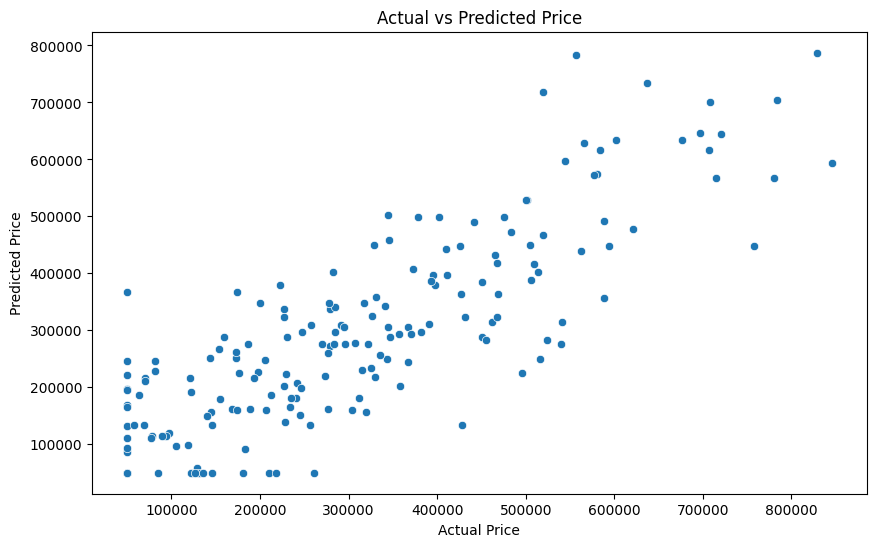

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [24]:
new_data=pd.DataFrame({
    "brand":label.fit_transform(["Toyota"]),
    "year":2012,
    "mileage_kmpl":12.22,
    "engine_cc":2020,
    "horsepower":120,
    "transmission":label.fit_transform(["automatic"]),
    "fuel_type":label.fit_transform(["diesel"]),
    "owner_type":label.fit_transform(["second"]),

})
predict=model.predict(new_data)
predict

array([352619.91])